### Step 3 - Build and Tune Random Forest Classifier

Using the results of Step 1 to inform the features, I will build, train, and tune a Decision tree Classifier model on the dataset.  

### Load Data

In [4]:
import pandas as pd

# Load Titanic training data from CSV file
titanic_train = pd.read_csv('titanic_train.csv')
titanic_train.head(n = 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Engineer Features

I will use some of the same features that I used for the Decision Tree.

In [31]:
train_wrangled = (titanic_train
                    .assign(Female = lambda df_: df_['Sex'].replace({'female':'1', 'male':'0'}).astype(int),
                            PartySize = lambda df_: df_['SibSp'] + df_['Parch'] + 1,
                            PartyFare = lambda df_: df_['Fare'] / df_['PartySize'],
                            Embarked = lambda df_: df_['Embarked'].fillna('S'),
                            CommaSplit = lambda df_: df_['Name'].str.split(', ', expand = True).loc[:, 1],
                            Title = lambda df_: df_['CommaSplit'].str.split('.', expand = True).loc[:, 0])
                 )

train_wrangled.head(n = 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,PartySize,PartyFare,CommaSplit,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,3.62500,Mr. Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,35.64165,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,7.92500,Miss. Laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,26.55000,Mrs. Jacques Heath (Lily May Peel),Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,8.05000,Mr. William Henry,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1,8.45830,Mr. James,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1,51.86250,Mr. Timothy J,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,5,4.21500,Master. Gosta Leonard,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,3,3.71110,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,2,15.03540,Mrs. Nicholas (Adele Achem),Mrs


### Encoding Categorical Features

In [33]:
from sklearn.preprocessing import OneHotEncoder

# Select features to use
cat_features = ['Pclass', 'Embarked', 'Title']

# Encode features and transform data
cat_encoder = OneHotEncoder(sparse_output = False)
cat_encoder.set_output(transform = 'pandas')

train_cat = cat_encoder.fit_transform(train_wrangled[cat_features])
train_cat.head()

,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Don,Title_Dr,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Build Predictors DataFrame

In [35]:
# Designate numeric features
num_features = ['SibSp', 'Parch', 'PartySize', 'PartyFare']

# Build data frame
titanic_X = pd.concat([train_wrangled[num_features], train_cat], axis = 1)
titanic_X.head()

,SibSp,Parch,PartySize,PartyFare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,2,3.62500,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0,2,35.64165,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,1,7.92500,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,26.55000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,1,8.05000,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Train Random Forest

Survived Reminder:  1 means Survived, 0 means Died.  Train a *RandomForestClassifier* using default hyperparameters. 

In [37]:
from sklearn.ensemble import RandomForestClassifier 

# Calculate OOB Score 
titanic_rf = RandomForestClassifier(random_state = 122345, oob_score = True) 
titanic_rf.fit(titanic_X, titanic_train['Survived'])
print(f'Estimated accuracy with OOB data: {titanic_rf.oob_score_:.4f}')

Estimated accuracy with OOB data: 0.8025


### Permutation Importance

In [45]:
from sklearn.inspection import permutation_importance 

importance = permutation_importance (titanic_rf, titanic_X, titanic_train['Survived'],
                                     n_repeats = 10, n_jobs = 2, random_state = 54321) 

sorted_idx=importance.importances_mean.argsort()

importance_dict = {
    'Feature': titanic_X.columns.values[sorted_idx],
    'Importance': importance.importances_mean[sorted_idx]}

# Create data frame 
importance_df = pd.DataFrame(importance_dict).sort_values('Importance', ascending = False)

In [47]:
importance_df.head(n=15)

,Feature,Importance
26,Title_Mr,0.162851
25,PartyFare,0.129293
24,Pclass_3,0.046577
23,Title_Miss,0.034905
22,PartySize,0.032323
21,Title_Mrs,0.030864
20,Pclass_1,0.026038
19,Parch,0.024130
18,SibSp,0.019416
17,Embarked_S,0.018631


In [49]:
importance_df.tail(n=15)

,Feature,Importance
14,Pclass_2,0.003816
13,Title_Rev,0.002245
12,Title_Master,0.002132
11,Title_Capt,0.001122
10,Title_Dr,0.001122
9,Title_Col,0.001122
8,Title_Major,0.001122
7,Title_Ms,0.001122
1,Title_Mme,0.000000
6,Title_Don,0.000000


### Cleanup Features

In [54]:
# Create Other category for random titles 

important_titles = ['Mrs', 'Mr', 'Miss', 'Master']
title_mask = train_wrangled['Title'].isin(important_titles) 
train_wrangled.loc[~title_mask,'Title']='Other'
train_wrangled['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

### Data Frame

In [57]:
train_cat = cat_encoder.fit_transform(train_wrangled[cat_features])
train_cat.head()

titanic_X = pd.concat([train_wrangled[num_features],train_cat],axis=1)
titanic_X.head()

,SibSp,Parch,PartySize,PartyFare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,2,3.62500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0,2,35.64165,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,1,7.92500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,0,2,26.55000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,1,8.05000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Train Model 

In [62]:
from sklearn.model_selection import ParameterGrid 

param_dict = {
    'n_estimators': [200,300,400,500,600],
    'max_features': [3,4,5,6],
    'min_samples_leaf': [8,9,10,11]}

param_list = list(ParameterGrid(param_dict))
print(param_list[0:5])

oob_accuracy = []

# Combos 
for params in param_list: 
    rf = RandomForestClassifier(n_estimators = params['n_estimators'], 
                                max_features = params['max_features'], 
                                min_samples_leaf = params['min_samples_leaf'], 
                                random_state = 12345, oob_score = True, n_jobs = 2)
    rf.fit(titanic_X, titanic_train['Survived'])
    oob_accuracy.append(rf.oob_score_)

[{'max_features': 3, 'min_samples_leaf': 8, 'n_estimators': 200}, {'max_features': 3, 'min_samples_leaf': 8, 'n_estimators': 300}, {'max_features': 3, 'min_samples_leaf': 8, 'n_estimators': 400}, {'max_features': 3, 'min_samples_leaf': 8, 'n_estimators': 500}, {'max_features': 3, 'min_samples_leaf': 8, 'n_estimators': 600}]


### Optimal Hyperparameters

In [70]:
import numpy as np

best_params = np.argmax(oob_accuracy) 
print(oob_accuracy[best_params]) 
print(param_list[best_params])

0.8260381593714927
{'max_features': 3, 'min_samples_leaf': 10, 'n_estimators': 500}


### Evaluate Accuracy and Standard Deviation

Let's see what some statistics say about how good the model is... 

In [73]:
params = param_list[best_params] 

oob_accuracy = []
for value in range(0,100): 
    rf = RandomForestClassifier(n_estimators = params['n_estimators'], 
                                max_features = params['max_features'], 
                                min_samples_leaf = params['min_samples_leaf'], 
                                oob_score = True, n_jobs = 2)
    rf.fit(titanic_X, titanic_train['Survived'])
    oob_accuracy.append(rf.oob_score_)

print(f'Mean OOB Accuracy: {np.average(oob_accuracy)}')
print(f'OOB Accuracy Std Deviation: {np.std(oob_accuracy)}')

Mean OOB Accuracy: 0.8167789001122333
OOB Accuracy Std Deviation: 0.0035398044417307025


Model Bias: 81.7% (mean accuracy), decent
Model Variance: 3.5% (standard deviation), high

### Test Model

In [76]:
# Prep data
titanic_test = pd.read_csv('titanic_test.csv')

test_wrangled = (titanic_test
                   .assign(Female = lambda df_: df_['Sex'].replace({'female': '1', 'male': '0'}).astype(int),
                           PartySize = lambda df_: df_['SibSp'] + df_['Parch'] + 1,
                           PartyFare = lambda df_: df_['Fare'] / df_['PartySize'],
                           Embarked = lambda df_: df_['Embarked'].fillna('S'),
                           CommaSplit = lambda df_: df_['Name'].str.split(', ', expand = True).loc[:, 1],
                           Title = lambda df_: df_['CommaSplit'].str.split('.', expand = True).loc[:, 0])
                 )

test_title_mask = test_wrangled['Title'].isin(important_titles)
test_wrangled.loc[~test_title_mask, 'Title'] = 'Other'

test_cat = cat_encoder.transform(test_wrangled[cat_features])

test_X = pd.concat([test_wrangled[num_features], test_cat], axis = 1)
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SibSp         418 non-null    int64  
 1   Parch         418 non-null    int64  
 2   PartySize     418 non-null    int64  
 3   PartyFare     417 non-null    float64
 4   Pclass_1      418 non-null    float64
 5   Pclass_2      418 non-null    float64
 6   Pclass_3      418 non-null    float64
 7   Embarked_C    418 non-null    float64
 8   Embarked_Q    418 non-null    float64
 9   Embarked_S    418 non-null    float64
 10  Title_Master  418 non-null    float64
 11  Title_Miss    418 non-null    float64
 12  Title_Mr      418 non-null    float64
 13  Title_Mrs     418 non-null    float64
 14  Title_Other   418 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 49.1 KB


In [77]:
# Impute missing data 
median_party_fare = titanic_X['PartyFare'].median()
print(median_party_fare) 
test_X.fillna({'PartyFare': median_party_fare},inplace=True)

8.3


In [83]:
# Predict
titanic_rf = RandomForestClassifier(n_estimators = params['n_estimators'], 
                                max_features = params['max_features'], 
                                min_samples_leaf = params['min_samples_leaf'], 
                                oob_score = True, n_jobs = 2, random_state = 12345)

titanic_rf.fit(titanic_X, titanic_train['Survived'])

test_predictions = titanic_rf.predict(test_X) 
test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

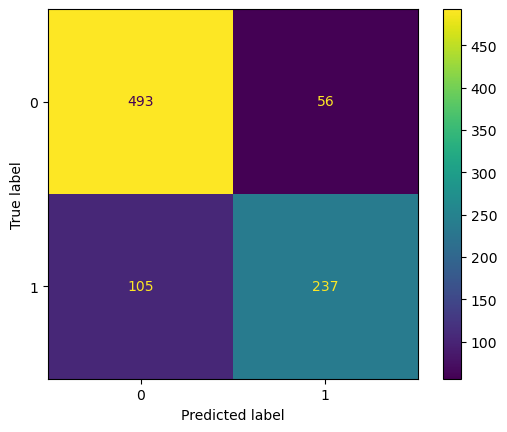

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

#Get OOB predictions
oob_predictions = titanic_rf.oob_decision_function_.argmax(axis=1) 

#Confusiuon matrix 
cm = confusion_matrix(titanic_train['Survived'], oob_predictions) 
cmd = ConfusionMatrixDisplay(cm) 
cmd.plot();

### Create CSV of Predictions

In [87]:
titanic_test['Survived'] = test_predictions 
titanic_test[['PassengerId','Survived']].to_csv('TitanicPredictions.csv',index=False)